# AML Homework 2
## 1. Binary Classification on Text Data.
### a. Down load the data.

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

train1 = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


#calculate the number of features in "text" column for both train and text datasets
training_data_points = len(train1["text"])
test_data_points = len(test["text"])
print(training_data_points)#7613
print(test_data_points) #3623

target_col = train1["target"]
disaster = 0

for i in range(0,7613):
    if target_col[i] == 1:
        disaster +=1

print(disaster) #3271

disaster_per = disaster/len(train1['target'])
non_disas_per = 1 - disaster_per
print(disaster_per) #0.4296597924602653
print(non_disas_per) #0.5703402075397347

7613
3263
3271
0.4296597924602653
0.5703402075397347


### b. Split the training data

In [3]:
#1-B


'''
train2 = train1.sample(frac = 0.7)
dev = train1.drop(train.index)
train2.to_csv('train2.csv', index=False)
dev.to_csv('dev.csv', index = False)


'''


#After we randonly choose 70% data points of training dataset to form train2 and 30%data points to form
# dev, We save train2 and dev into train2.csv and dev.csv.
#Since we want to keep the two randomly generated datasets fixed, we comment off the code for #1-B， and utilize fixed
#datasets train2.csv and dev.csv for the following questions





"\ntrain2 = train1.sample(frac = 0.7)\ndev = train1.drop(train.index)\ntrain2.to_csv('train2.csv', index=False)\ndev.to_csv('dev.csv', index = False)\n\n\n"

### c. Preprocess the Data

In [4]:
#1-C
import pandas as pd
import re

train2 = pd.read_csv('train2.csv')
dev = pd.read_csv('dev.csv')
test = pd.read_csv('test.csv')

#remove all the urls, since they cannot be put into the bag of words and cannot be processed as text
for i in range(0, len(train2["text"])):
    train2.at[i, 'text'] = re.sub(r"http\S+", "", train2["text"][i])

for i in range(0, len(dev["text"])):
    dev.at[i, 'text'] = re.sub(r"http\S+", "", dev["text"][i])

for i in range(0, len(test["text"])):
    test.at[i, 'text'] = re.sub(r"http\S+", "", test["text"][i])

#convert all the words to lowercase : we do this since lower case will help us to generate bag
# of words with words in a uniform way, which is convenient for us to compute later
train2["text"] = train2["text"].str.lower()
dev["text"] = dev["text"].str.lower()
test["text"] = test["text"].str.lower()


In [5]:
#remove puncatuation, since they cannot be processed as text and cannot be put into the bag of words
for i in range(0, len(dev["text"])):
    dev.at[i, 'text'] = re.sub('[^a-zA-Z]', " ", dev["text"][i] )

for i in range(0, len(train2["text"])):
    train2.at[i , 'text'] = re.sub('[^a-zA-Z]', " ", train2["text"][i] )

for i in range(0, len(test["text"])):
    test.at[i, 'text'] = re.sub('[^a-zA-Z]', " ", test["text"][i] )

#remove stopwords, since they appear too frequently to count as unique words which should be put into the bag of words
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
train2['text'] = train2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dev['text'] = dev['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['text'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [6]:
#lemmatize, to lemmatize accurately, we must specify the pos_tag of each word so that we will not confuse.
# The reason for lemmatizing is that we want to remove inflectional endings only and to return the base or
#dictionary form of the word
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

for i in range(0, len(train2['text'])):
    sentence = train2['text'][i]
    word_list = nltk.word_tokenize(sentence)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list])
    train2.at[i, 'text'] = lemmatized_output

for i in range(0, len(dev['text'])):
    sentence = dev['text'][i]
    word_list = nltk.word_tokenize(sentence)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list])
    dev.at[i,'text'] = lemmatized_output

for i in range(0, len(test['text'])):
    sentence = test['text'][i]
    word_list = nltk.word_tokenize(sentence)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list])
    test.at[i, 'text'] = lemmatized_output


[nltk_data] Downloading package punkt to /Users/panda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/panda/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/panda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### d. Bag of Words model

In [7]:
#1-D

from sklearn.feature_extraction.text import CountVectorizer

# min_df helps us to remove the words that appear too infrequently

M = 1
count_vect = CountVectorizer(binary=True,min_df = M)
tweet_list_train = train2['text'].tolist()
tweet_list_dev = dev['text'].tolist()

#form dictionary for train2.csv and related vectors
train_bag = count_vect.fit_transform(tweet_list_train)
train_vocab = count_vect.vocabulary_  

#form dictionary for dev.csb and related vectors
dev_bag = count_vect.fit_transform(tweet_list_dev)
dev_vocab = count_vect.vocabulary_

train_vec = train_bag.toarray()

dev_vec = dev_bag.toarray()

train_features = train_vec.shape
dev_features = dev_vec.shape

print(train_features)#(5329, 11149)
print(dev_features)#(2284, 6564)





(5329, 11149)
(2284, 6576)


### e. Implement a naive Bayes classifier

In [81]:
#1-E

def nb_predictions(x_predict, X_train, y_train):

    n = X_train.shape[0] # size of the dataset
    d = X_train.shape[1] # number of features in our dataset
    K = 2 # number of clases - Bernouli

    # these are the shapes of the parameters
    psis = np.zeros([K,d])
    phis = np.zeros([K])
    # we now compute the parameters

    for k in range(K):
        X_k = X_train[y_train == k] # data is sorted based on target k=0,1,2
        psis[k] = np.mean(X_k, axis=0)
        phis[k] = X_k.shape[0] / float(n)

    """This returns class assignments and scores under the NB model.

    We compute \arg\max_y p(y|x) as \arg\max_y p(x|y)p(y)
    """
    # adjust shapes
    n, d = x_predict.shape
    x_predict = np.reshape(x_predict, (1, n, d))
    psis = np.reshape(psis, (K, 1, d))

    # clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14)

    # compute log-probabilities
    logpy = np.log(phis).reshape([K,1])
    logpxy = x_predict * np.log(psis) + (1-x_predict) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy
    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

In [10]:
# testing the NB model

#adjust the length of bag-of-words dev vector according to the length of train_vec
M = 1
count_vect = CountVectorizer(binary=True,min_df = M, vocabulary=train_vocab)
dev_bag = count_vect.fit_transform(tweet_list_dev)
dev_vocab = count_vect.vocabulary_
dev_vec = dev_bag.toarray()


pred, logpyx = nb_predictions(dev_vec, train_vec, train2['target'])

# f1 score:

from sklearn.metrics import f1_score

y_true = dev['target']
y_pred = pred
f1_score = f1_score(y_true, y_pred)
print(f1_score) 

0.8829194120628485


### f. Logistic regression prediction

In [11]:
## 1-F

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

#create logistic regression object
logreg = LogisticRegression()
logreg.fit(train_vec, train2['target'])
dev_pred = logreg.predict(dev_vec)

#F1 Score
y_true = dev['target']
y_pred = dev_pred
f1_score = f1_score(y_true, y_pred)
print('The F1 score is: ',f1_score) #0.8942408376963351

print("weight vector of the train model is:",logreg.coef_[0])


#The weight wi represents how important that the input feature is to the classification problem.
#If wi is negative, it means that the feature Xi is not associated with the class. Thus, we need to 
#find out the positive weight, locate its index and report the word in our vocabulary given 
#to the index

num = len(logreg.coef_[0])
star_words_index = []
for i in range(0, num):
    if logreg.coef_[0][i] > 0:
        star_words_index.append(i)
        
star_words = [] #contains all the important words to decide a disaster tweet
    
for word, idx in train_vocab.items():
    if idx in star_words_index:
        star_words.append(word)
# print(star_words)

The F1 score is:  0.8942408376963351
weight vector of the train model is: [-0.03932014 -0.05604755  0.0811659  ... -0.14919338  0.25908994
 -0.08815393]


### g. Linear SVM prediction. 

In [12]:
# 1-G
# Linear SVM prediction

from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

f1_list = []
ci_list = [0.01, 0.1, 1, 10, 100]

for ci in ci_list:
    lsvc = LinearSVC(C = ci, max_iter = 100000)
    lsvc.fit(train_vec, train2['target'])
    pred_dev = lsvc.predict(dev_vec)
    y_true = dev['target']
    f1_list.append(f1_score(y_true, pred_dev))
    
print(f1_list)

for i in range(len(f1_list)):
    if(f1_list[i] == max(f1_list)):
        print("The biggest F1 score happens at C equals to", ci_list[i])
  
 
      
#Thus，we can tell that when C = 1, its related F1 Score is highest,
# and therefore brings the best classification performance
# Also, since the best F-1 score in this question is 0.9129989764585466, which is larger than the F1 score 
# 0.8971668415529905 generated by above. Therefore, this best linear SVM classifier is better than the logistic
# regression classifier above. (Note: the statistics might change as we re-run the code everytime, which does not
# influence our conclusions)



[0.7959527824620573, 0.8933263268523384, 0.9109518935516888, 0.9113149847094801, 0.9047376464595007]
The biggest F1 score happens at C equals to 10


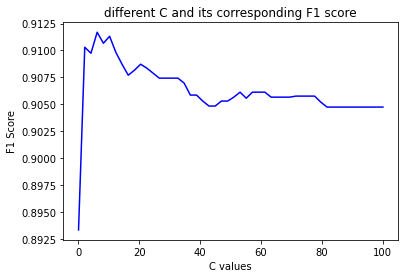

Max C is  0.9116896375701888 where C is around 6.216326530612245


In [13]:

# #Now， Let's draw the plot
import matplotlib.pyplot as plt
import numpy as np

f1_list = []
x_axis = np.linspace(0.1,100,50)

for ci in x_axis:
    lsvc = LinearSVC(C = ci, max_iter = 100000)
    lsvc.fit(train_vec, train2['target'])
    pred_dev = lsvc.predict(dev_vec)
    y_true = dev['target']
    f1_list.append(f1_score(y_true, pred_dev))


plt.title('different C and its corresponding F1 score')
plt.xlabel('C values')
plt.ylabel('F1 Score')
plt.plot(x_axis, f1_list, color = 'blue')
plt.show()
print('Max C is ', max(f1_list), 'where C is around', x_axis[f1_list.index(max(f1_list))])



<!-- <left><img width=43% src="img/g_c_f1.png"></left> -->

- Max F1 is  0.9116896375701888 where C is around 6.216326530612245

In [30]:
#now re-compute the LinearSVC to find out the most important words
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

best_lsvc = LinearSVC(C = 1)
best_lsvc.fit(train_vec, train2['target'])
best_pred_dev = best_lsvc.predict(dev_vec)

print("The weight vector for linear SVM classifier is: ", best_lsvc.coef_[0])
#similarly, whereever the weight is positive, we need to extract its corresponding index
num = len(best_lsvc.coef_[0])
important_ind = []

for i in range(0, num):
    if best_lsvc.coef_[0][i] > 0:
        important_ind.append(i)
        
important_words = []

for word, idx in train_vocab.items():
    if idx in important_ind:
        important_words.append(word)
        
# print(important_words)

#compare the two lists of important words we get from logistic regression and Linear SVC
if (star_words == important_words):
    print("Yes, they are the same")
else:
    print("No, they are not the same")

The weight vector for linear SVM classifier is:  [ 0.          0.          0.13289827 ... -0.10159303  0.19709372
  0.        ]
No, they are not the same


- The weight vector for linear SVM classifier is:  [ 0.          0.          0.13289827 ... -0.10159303  0.19709372
  0.        ]
- No, they are not the same

### h. Non-linear SVM


In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score

C_list = [0.01, 0.1, 1.0, 10.0, 100.0]

# non_lsvc = svm.SVC()
non_lsvc = svm.SVC(kernel='rbf', gamma=10)
non_lsvc.fit(train_vec, train2['target'])
# non_lsvc.fit(train_vec, train2['target'])
pred_dev = non_lsvc.predict(dev_vec)

#F1 Score
y_true = dev['target']
f1_score_nl = f1_score(y_true, pred_dev)
print('The F1 score is: ',f1_score_nl)


f1_list = []
for ci in C_list:
    non_lsvc = svm.SVC(kernel='rbf', gamma=ci)
    non_lsvc.fit(train_vec, train2['target'])
#     non_lsvc.fit(train_vec, train2['target'])
    pred_dev = non_lsvc.predict(dev_vec)
    f1_score_nl = f1_score(y_true, pred_dev)
    f1_list.append(f1_score_nl)
print(f1_list)

In [ ]:
#Now， Let's draw the plot
import matplotlib.pyplot as plt
import numpy as np

f1_list = []
x_axis = np.linspace(0.01,50,30)

for ci in x_axis:
    non_lsvc = svm.SVC(kernel='rbf', gamma=ci, verbose = True)
    non_lsvc.fit(train_vec, train2['target'])
    pred_dev = non_lsvc.predict(dev_vec)
    y_true = dev['target']
    f1_list.append(f1_score(y_true, pred_dev))


plt.title('different C and its corresponding F1 score')
plt.xlabel('C values')
plt.ylabel('F1 Score')
plt.plot(x_axis, f1_list, color = 'blue')
plt.show()

<left><img width=43% src="img/h_c_f1.png"></left>

In [ ]:
print('Max C is ', max(f1_list), 'where C is around', x_axis[f1_list.index(max(f1_list))])

- Max C is  0.8811563169164881 where C is around 0.1

### i. N-Gram model

In [8]:
#1-i (N-Gram)
from sklearn.feature_extraction.text import CountVectorizer

M = 1
count_vect_1 = CountVectorizer(ngram_range=(1,2), binary=True, min_df = M)

tweet_list_train= train2['text'].tolist()
tweet_list_dev = dev['text'].tolist()
train_bag = count_vect_1.fit_transform(tweet_list_train)
train_vocab = count_vect_1.vocabulary_  

count_vect2 = CountVectorizer(ngram_range=(1,2), binary=True, min_df = M)
dev_bag2 = count_vect2.fit_transform(tweet_list_dev)
dev_vocab = count_vect2.vocabulary_

train_vec = train_bag.toarray()
dev_vec = dev_bag.toarray()

train_features = train_vec.shape
dev_features = dev_vec.shape

#print(train_features) #(5329, 44220)
#print(dev_features)    #(2284, 22027)
#print(len(train_vocab)) #44220

In [9]:
total_2gram_train = 0
total_1gram_train = 0

for word, idx in train_vocab.items():
    if ' ' in word:
        total_2gram_train +=1
    else:
        total_1gram_train +=1
print("The total number of 2gram in train vocabulary is: ", total_2gram_train)
print("The total number of 1gram in train vocabulary is: ", total_1gram_train)

if( len(train_vocab) == total_2gram_train+total_1gram_train ):
    print("correct number!")

The total number of 2gram in train vocabulary is:  33071
The total number of 1gram in train vocabulary is:  11149
correct number!


<b>i_1. repeat(e): Naive Bayes

In [90]:
# testing the NB model

#adjust the length of dev vector according to the length of train_vec
count_vect = CountVectorizer(binary=True,min_df = M, vocabulary=train_vocab)
dev_bag = count_vect.fit_transform(tweet_list_dev)
dev_vocab = count_vect.vocabulary_
dev_vec = dev_bag.toarray()


pred, logpyx = nb_predictions(dev_vec, train_vec, train2['target'])

# f1 score:

from sklearn.metrics import f1_score

y_true = dev['target']
y_pred = pred
f1_score = f1_score(y_true, y_pred)
print(f1_score) 

0.8876346844535659


- f1_score is 0.8876346844535659

<b>i_2. repeat(f): logistic regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

#create logistic regression object
logreg = LogisticRegression()
logreg.fit(train_vec, train2['target'])
dev_pred = logreg.predict(dev_vec)

#F1 Score
y_true = dev['target']
y_pred = dev_pred
f1_score = f1_score(y_true, y_pred)
print('The F1 score is: ',f1_score) 

print("weight vector of the train model is:",logreg.coef_[0])


#The weight wi represents how important that the input feature is to the classification problem.
#If wi is negative, it means that the feature Xi is not associated with the class. Thus, we need to 
#find out the positive weight, locate its index and report the word in our vocabulary given 
#to the index

num = len(logreg.coef_[0])
star_words_index = []
for i in range(0, num):
    if logreg.coef_[0][i] > 0:
        star_words_index.append(i)
        
star_words = [] #contains all the important words to decide a disaster tweet
    
for word, idx in train_vocab.items():
    if idx in star_words_index:
        star_words.append(word)
# print(star_words)

The F1 score is:  0.8569874932028276
weight vector of the train model is: [-0.04876664 -0.04876664 -0.05398438 ...  0.1462892  -0.04595182
 -0.04595182]


- The F1 score is:  0.8569874932028276
- weight vector of the train model is: [-0.04876664 -0.04876664 -0.05398438 ...  0.1462892  -0.04595182
 -0.04595182]

<b>i_3. repeat(g): Linear SVM

In [92]:
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

f1_list = []
ci_list = [0.01, 0.1, 1, 10, 100]

for ci in ci_list:
    lsvc = LinearSVC(C = ci, max_iter = 100000)
    lsvc.fit(train_vec, train2['target'])
    pred_dev = lsvc.predict(dev_vec)
    y_true = dev['target']
    f1_list.append(f1_score(y_true, pred_dev))
    
print(f1_list)

for i in range(len(f1_list)):
    if(f1_list[i] == max(f1_list)):
        print("The biggest F1 score happens at C equals to", ci_list[i])
  

[0.7771295215869312, 0.8683926645091695, 0.8881856540084389, 0.8776371308016877, 0.8728232189973615]
The biggest F1 score happens at C equals to 1


- [0.7771295215869312, 0.8683926645091695, 0.8881856540084389, 0.8776371308016877, 0.8728232189973615]
- The biggest F1 score happens at C equals to 1

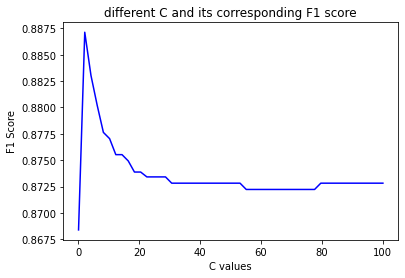

Max C is  0.8871308016877637 where C is around 2.138775510204082


In [93]:
#Now， Let's draw the plot
import matplotlib.pyplot as plt
import numpy as np

f1_list = []
x_axis = np.linspace(0.1,100,50)

for ci in x_axis:
    lsvc = LinearSVC(C = ci, max_iter = 100000)
    lsvc.fit(train_vec, train2['target'])
    pred_dev = lsvc.predict(dev_vec)
    y_true = dev['target']
    f1_list.append(f1_score(y_true, pred_dev))


plt.title('different C and its corresponding F1 score')
plt.xlabel('C values')
plt.ylabel('F1 Score')
plt.plot(x_axis, f1_list, color = 'blue')
plt.show()
print('Max C is ', max(f1_list), 'where C is around', x_axis[f1_list.index(max(f1_list))])



<left><img width=43% src="img/i_3.png"></left>
- Max C is  0.8871308016877637 where C is around 2.138775510204082

<b> 4. repeat(h): non-linear

In [84]:
from sklearn import svm
from sklearn.metrics import f1_score

# non_lsvc = svm.SVC()
non_lsvc = svm.SVC(kernel='rbf', gamma=0.1)
non_lsvc.fit(train_vec, train2['target'])
# non_lsvc.fit(train_vec, train2['target'])
pred_dev = non_lsvc.predict(dev_vec)

#F1 Score
y_true = dev['target']
f1_score_nl = f1_score(y_true, pred_dev)
print('The F1 score is: ',f1_score_nl)

ValueError: X.shape[1] = 6576 should be equal to 44220, the number of features at training time

<b>----------------------------------------------------------------------------------------------------------------

## 1-J Incorporating the additional columns.

In [12]:
#1-J
# utility func:
def preprocess(dataset_list, column_list):
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk.corpus import wordnet
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    for dataset in dataset_list:
        for col_name in column_list:
            for i in range(0, len(dataset[col_name])):
                word = dataset[col_name][i]
                if (type(word) is str):
                    # clean URL: 
                    #remove all the urls, since they cannot be put into the bag of words and cannot be processed as text
                    dataset.at[i, col_name] = re.sub(r"http\S+", "", dataset[col_name][i])
                    # replace %20 to spaces
                    if ('%20' in word):
                        dataset.at[i, col_name] = word.replace('%20', ' ')
                    # lowercase
                    dataset[col_name] = dataset[col_name].str.lower()
                    #remove puncatuation
                    dataset.at[i, col_name] = re.sub('[^a-zA-Z]', " ", dataset[col_name][i])
                    
                    #lemmatize, to lemmatize accurately, we must specify the pos_tag of each word so that we will not confuse.
                    # The reason for lemmatizing is that we want to remove inflectional endings only and to return the base or
                    #dictionary form of the word
                    sentence = dataset[col_name][i]
                    word_list = nltk.word_tokenize(sentence)
                    lemmatized_output = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list])
                    dataset.at[i, col_name] = lemmatized_output
                else: # word is not a string
                    dataset.at[i, col_name] = ''

# return list of vector from data set
def txt_vectorization (dataset_list, column_list, M=1):
    dataset_vec_list = []
    for dataset in dataset_list:
        for col_name in column_list:
            tweet_list_dataset = dataset[col_name].tolist()
            count_vect = CountVectorizer(binary=True, min_df = M, vocabulary=train_vocab)
            dataset_bag = count_vect.fit_transform(tweet_list_dataset)
            dataset_vec = dataset_bag.toarray()
            dataset_vec_list.append(dataset_vec)
    return(dataset_vec_list)

In [152]:
dataset_list = [train2, dev, test]
column_list = ['keyword', 'location']

preprocess(dataset_list, column_list)
dataset_vec_list = txt_vectorization(dataset_list, column_list, 1)

[nltk_data] Downloading package punkt to /Users/panda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/panda/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/panda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


before:  (5329, 11149)
after:  (8592, 11149)


In [182]:
#adjust the length of bag-of-words dev vector according to the length of train_vec
M = 1
count_vect = CountVectorizer(binary=True,min_df = M, vocabulary=train_vocab)
dev_bag = count_vect.fit_transform(tweet_list_dev)
dev_vec = dev_bag.toarray()

train_vec_1J = np.copy(train_vec)
train_target_1J = np.copy(train2['target'])

dev_vec_1J = dev_vec
dev_target_1J = np.copy(dev['target'])

# append the feature vec to our main "text" vec

for vec in dataset_vec_list:
    if (vec.shape[0] == train2['target'].shape[0]):
        train_vec_1J = np.append(train_vec_1J, vec,axis=0)
    if (vec.shape[0] == dev['target'].shape[0]):
        dev_vec_1J = np.append(dev_vec_1J, vec,axis=0)

# since more feature appended to the bag,
# there should be more target value now
# so the target column should have len(column_list) times more
for i in range(0, len(column_list)): 
    train_target_1J = np.append(train_target_1J, train2['target'],axis=0)
    dev_target_1J = np.append(dev_target_1J, dev['target'],axis=0)

<b>J_1. repeat(e): Naive Bayes

In [183]:
from sklearn.metrics import f1_score

# NB model: 
y_pred, logpyx = nb_predictions(dev_vec, train_vec_1J, train_target_1J)
y_true = dev['target']
f1_score = f1_score(y_true, y_pred)
print("f1_score of NB model is ", f1_score) 

f1_score of NB model is  0.8848484848484848


<b>J_2. repeat(f): Logistic regression

In [184]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

#create logistic regression object
logreg = LogisticRegression()
logreg.fit(train_vec, train2['target'])
y_pred = logreg.predict(dev_vec)
#F1 Score
y_true = dev['target']
f1_score = f1_score(y_true, y_pred)
print('The F1 score is: ',f1_score) 
print("weight vector of the train model is:",logreg.coef_[0])

The F1 score is:  0.8942408376963351
weight vector of the train model is: [-0.03932014 -0.05604755  0.0811659  ... -0.14919338  0.25908994
 -0.08815393]


<b>J_3. repeat(g): Linear SVM

In [186]:
# 1-G
# Linear SVM prediction

from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

f1_list = []
ci_list = [0.01, 0.1, 1, 10, 100]

for ci in ci_list:
    lsvc = LinearSVC(C = ci, max_iter = 100000)
    lsvc.fit(train_vec, train2['target'])
    pred_dev = lsvc.predict(dev_vec)
    y_true = dev['target']
    f1_list.append(f1_score(y_true, pred_dev))
    
print(f1_list)

for i in range(len(f1_list)):
    if(f1_list[i] == max(f1_list)):
        print("The biggest F1 score happens at C equals to", ci_list[i])

[0.7959527824620573, 0.8933263268523384, 0.9109518935516888, 0.9113149847094801, 0.9047376464595007]
The biggest F1 score happens at C equals to 10


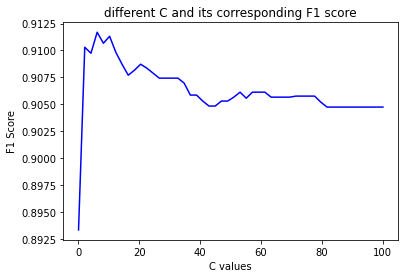

Max C is  0.9116896375701888 where C is around 6.216326530612245


In [187]:

#Now， Let's draw the plot
import matplotlib.pyplot as plt
import numpy as np

f1_list = []
x_axis = np.linspace(0.1,100,50)

for ci in x_axis:
    lsvc = LinearSVC(C = ci, max_iter = 100000)
    lsvc.fit(train_vec, train2['target'])
    pred_dev = lsvc.predict(dev_vec)
    y_true = dev['target']
    f1_list.append(f1_score(y_true, pred_dev))


plt.title('different C and its corresponding F1 score')
plt.xlabel('C values')
plt.ylabel('F1 Score')
plt.plot(x_axis, f1_list, color = 'blue')
plt.show()
print('Max C is ', max(f1_list), 'where C is around', x_axis[f1_list.index(max(f1_list))])

<left><img width=43% src="img/j_2.png"></left>
- Max C is  0.9116896375701888 where C is around 6.216326530612245

<b> 3. repeat(h): Non-Linear SVM

In [188]:
from sklearn import svm
from sklearn.metrics import f1_score

C_list = [0.01, 0.1, 1.0, 10.0, 100.0]

# non_lsvc = svm.SVC()
non_lsvc = svm.SVC(kernel='rbf', gamma=10)
non_lsvc.fit(train_vec, train2['target'])
# non_lsvc.fit(train_vec, train2['target'])
pred_dev = non_lsvc.predict(dev_vec)

#F1 Score
y_true = dev['target']
f1_score_nl = f1_score(y_true, pred_dev)
print('The F1 score is: ',f1_score_nl)


f1_list = []
for ci in C_list:
    non_lsvc = svm.SVC(kernel='rbf', gamma=ci)
    non_lsvc.fit(train_vec, train2['target'])
#     non_lsvc.fit(train_vec, train2['target'])
    pred_dev = non_lsvc.predict(dev_vec)
    f1_score_nl = f1_score(y_true, pred_dev)
    f1_list.append(f1_score_nl)
print(f1_list)

The F1 score is:  0.8369942196531792
[0.6872246696035242, 0.8811563169164881, 0.845183486238532, 0.8369942196531792, 0.8369942196531792]


- The Max F1 score is:  0.8811563169164881

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

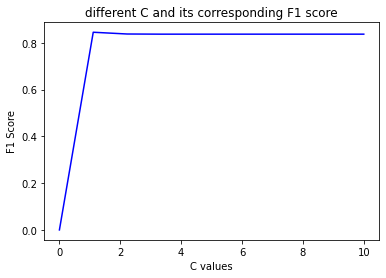

In [189]:
#Now， Let's draw the plot
import matplotlib.pyplot as plt
import numpy as np

f1_list = []
x_axis = np.linspace(0.001,10,10)

for ci in x_axis:
    non_lsvc = svm.SVC(kernel='rbf', gamma=ci, verbose = True)
    non_lsvc.fit(train_vec, train2['target'])
    pred_dev = non_lsvc.predict(dev_vec)
    y_true = dev['target']
    f1_list.append(f1_score(y_true, pred_dev))


plt.title('different C and its corresponding F1 score')
plt.xlabel('C values')
plt.ylabel('F1 Score')
plt.plot(x_axis, f1_list, color = 'blue')
plt.show()

In [ ]:
print('Max C is ', max(f1_list), 'where C is around', x_axis[f1_list.index(max(f1_list))])

In [39]:
#preprocess data in train1 (entiring training dataset)

dataset_list = [train1, test]
column_list = ['text', 'keyword', 'location']
preprocess(dataset_list, column_list)
dataset_vec_list = txt_vectorization(dataset_list, column_list, 1)


[nltk_data] Downloading package punkt to /Users/panda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/panda/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/panda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [75]:
#adjust the length of bag-of-words dev vector according to the length of train_vec
tweet_list_test = test['text'].tolist()
M = 1
count_vect = CountVectorizer(binary=True,min_df = M, vocabulary=train_vocab)
test_bag = count_vect.fit_transform(tweet_list_test)
test_vocab = count_vect.vocabulary_
test_vec = test_bag.toarray()

print(dataset_vec_list[0].shape)
train1_vec_1K = []
train1_target_1K = []

test_vec_1K = test_vec

# append the feature vec to our main "text" vec

for vec in dataset_vec_list:
    if len(train1_vec_1K)<1:
        print("times1")
        train1_vec_1K = vec
    elif (vec.shape[0] == train1['target'].shape[0]):
        print("times")
        train1_vec_1K = np.append(train1_vec_1K, vec,axis=0)

# since more feature appended to the bag,
# there should be more target value now
# so the target column should have len(column_list) times more
for i in range(0, len(column_list)): 
    print("times")
    train1_target_1K = np.append(train1_target_1K, train1['target'],axis=0)
print(train1_vec_1K.shape, train1_target_1K.shape)


(7613, 44220)
times1
times
times
times
times
times
(22839, 44220) (22839,)


In [202]:
# #adjust the length of bag-of-words test vector 
# M = 1
# count_vect = CountVectorizer(binary=True,min_df = M, vocabulary=train_vocab)
# test_bag = count_vect.fit_transform(tweet_list_test)
# test_vocab = count_vect.vocabulary_
# test_vec = test_bag.toarray()

In [77]:
#predict by logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
logreg = LogisticRegression()
print(train_vec_1K.shape, train1_target_1K.shape)
logreg.fit(train1_vec_1K, train1_target_1K)
lrg_pred = logreg.predict(test_vec)

(15226, 44220) (22839,)


In [90]:
#predict by using linearSVC
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C = 6.2, max_iter = 100000)
lsvc.fit(train1_vec_1K, train1_target_1K)
pred_lin = lsvc.predict(test_vec)

In [82]:
#predict by NB
pred_NB, logpyx = nb_predictions(test_vec, train1_vec_1K, train1_target_1K)

In [93]:
#make submission

final_output = pred_lin.astype(int)
sub = pd.DataFrame({'id':test['id'].values.tolist(), 'target':final_output})
sub.to_csv('submission.csv', index = False)